In [1]:
import geopandas as gpd
import numpy as np
import rasterio
from pyproj import Transformer
import pandas as pd

In [65]:
import matplotlib.pyplot as plt

In [3]:
np.full(5, 3.14)

array([3.14, 3.14, 3.14, 3.14, 3.14])

In [5]:
shapefile_path = "../data/land_cover/cop/CLC18_IE_wgs84/CLC18_IE_wgs84.shp"

In [7]:
gdf = gpd.read_file(shapefile_path)
gdf

,OBJECTID,ID,CODE_18,Class_Desc,Area_Ha,Shape_STAr,Shape_STLe,geometry
0,1,IE_1,111,Continuous urban fabric,3.593744e+01,3.595292e+05,3.399929e+03,"POLYGON ((-8.73762 51.74733, -8.73753 51.74732..."
1,2,IE_2,111,Continuous urban fabric,1.785159e+02,1.785928e+06,9.115961e+03,"POLYGON ((-8.46873 51.90207, -8.46850 51.90206..."
2,3,IE_3,111,Continuous urban fabric,2.767229e+01,2.768421e+05,3.185437e+03,"POLYGON ((-7.84092 51.94764, -7.84102 51.94763..."
3,4,IE_4,111,Continuous urban fabric,4.389431e+01,4.391323e+05,3.740968e+03,"POLYGON ((-9.50588 52.06310, -9.50612 52.06227..."
4,5,IE_5,111,Continuous urban fabric,5.020679e+01,5.022843e+05,3.335530e+03,"POLYGON ((-8.64723 52.14024, -8.64715 52.14023..."
...,...,...,...,...,...,...,...,...
18877,18878,IE_18878,522,Estuaries,5.021254e+01,5.023418e+05,5.987252e+03,"POLYGON ((-8.31413 55.09169, -8.31299 55.09124..."
18878,18879,IE_18879,522,Estuaries,1.747832e+02,1.748585e+06,1.643064e+04,"POLYGON ((-7.85675 55.15326, -7.85667 55.15326..."
18879,18880,IE_18880,522,Estuaries,8.743091e+01,8.746859e+05,9.344419e+03,"POLYGON ((-8.12393 55.15333, -8.12390 55.15333..."
18880,18881,IE_18881,522,Estuaries,2.865799e+02,2.867034e+06,1.934943e+04,"POLYGON ((-7.32624 55.31113, -7.32619 55.31113..."


In [79]:
ground_truth_raster_file = "../data/land_cover/crookstown/raster/cropped_raster.tif"

In [81]:
def get_data_frame(file_path, latlon_crs = 'epsg:4326'):
    with rasterio.open(file_path) as f:
        zz = f.read(1)
        x = np.linspace(f.bounds.left, f.bounds.right, f.shape[1])
        y = np.linspace(f.bounds.bottom, f.bounds.top, f.shape[0])
        xx, yy = np.meshgrid(x, y)
        df = pd.DataFrame({
            'x': xx.flatten(),
            'y': yy.flatten(),
            'value': zz.flatten(),
        })
        transformer = Transformer.from_crs(f.crs, latlon_crs, always_xy=False)
        df['lat'], df['lon'] = transformer.transform(xx=df.x, yy=df.y)
        df.drop(columns=['x', 'y'], inplace=True)
        df = df[['lat', 'lon', 'value']]
        return df

In [83]:
df = get_data_frame(ground_truth_raster_file)
df

,lat,lon,value
0,-8.990286,51.785690,-128
1,-8.988815,51.785690,-128
2,-8.987344,51.785690,-128
3,-8.985873,51.785690,-128
4,-8.984402,51.785690,-128
...,...,...,...
13627,-8.788750,51.871608,-128
13628,-8.787279,51.871608,-128
13629,-8.785808,51.871608,-128
13630,-8.784337,51.871608,-128


In [15]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [17]:
def point_contains(point, gdf):
    code = None
    for _, row in gdf.iterrows():
        polygon = row['geometry']
        if polygon.contains(point):
            code = row['CODE_18']
    return code

In [ ]:
rows = []
for _, row in df.iterrows():
    point = Point(row['lat'], row['lon'])
    code = point_contains(point, gdf)
    print(f"code of {point} is : {code}")
    rows.append([row['lat'], row['lon'], code])

code of POINT (-8.990286044726673 51.785690222350254) is : 243
code of POINT (-8.988814977615528 51.785690222350254) is : 243
code of POINT (-8.987343910504382 51.785690222350254) is : 324
code of POINT (-8.985872843393237 51.785690222350254) is : 324
code of POINT (-8.984401776282091 51.785690222350254) is : 324
code of POINT (-8.982930709170946 51.785690222350254) is : 231
code of POINT (-8.981459642059798 51.785690222350254) is : 231
code of POINT (-8.979988574948653 51.785690222350254) is : 231
code of POINT (-8.978517507837507 51.785690222350254) is : 231
code of POINT (-8.977046440726362 51.785690222350254) is : 231
code of POINT (-8.975575373615216 51.785690222350254) is : 231
code of POINT (-8.97410430650407 51.785690222350254) is : 231
code of POINT (-8.972633239392925 51.785690222350254) is : 231
code of POINT (-8.97116217228178 51.785690222350254) is : 231
code of POINT (-8.969691105170634 51.785690222350254) is : 231
code of POINT (-8.968220038059489 51.785690222350254) is 

In [19]:
csv_path = "../data/land_cover/crookstown/labels.csv"

In [75]:
df = pd.read_csv(csv_path, usecols=["lat","lon", "value", "CODE_18"])
df["CODE_18"].to_numpy().shape

(13632,)

In [77]:
df

,lat,lon,value,CODE_18
0,-8.990286,51.785690,-128,243
1,-8.988815,51.785690,-128,243
2,-8.987344,51.785690,-128,324
3,-8.985873,51.785690,-128,324
4,-8.984402,51.785690,-128,324
...,...,...,...,...
13627,-8.788750,51.871608,-128,231
13628,-8.787279,51.871608,-128,231
13629,-8.785808,51.871608,-128,231
13630,-8.784337,51.871608,-128,231


In [53]:
df = df.rename(columns={"CODE_18": "landcover_class"})
df

,lat,lon,landcover_class
0,-8.990286,51.785690,243
1,-8.988815,51.785690,243
2,-8.987344,51.785690,324
3,-8.985873,51.785690,324
4,-8.984402,51.785690,324
...,...,...,...
13627,-8.788750,51.871608,231
13628,-8.787279,51.871608,231
13629,-8.785808,51.871608,231
13630,-8.784337,51.871608,231


In [55]:
type(gdf)

pandas.core.frame.DataFrame

In [59]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs = 'EPSG:4326')
gdf

,lat,lon,landcover_class,geometry
0,-8.990286,51.785690,243,POINT (51.78569 -8.99029)
1,-8.988815,51.785690,243,POINT (51.78569 -8.98881)
2,-8.987344,51.785690,324,POINT (51.78569 -8.98734)
3,-8.985873,51.785690,324,POINT (51.78569 -8.98587)
4,-8.984402,51.785690,324,POINT (51.78569 -8.98440)
...,...,...,...,...
13627,-8.788750,51.871608,231,POINT (51.87161 -8.78875)
13628,-8.787279,51.871608,231,POINT (51.87161 -8.78728)
13629,-8.785808,51.871608,231,POINT (51.87161 -8.78581)
13630,-8.784337,51.871608,231,POINT (51.87161 -8.78434)


In [61]:
gdf.total_bounds

array([51.78569022, -8.99028604, 51.8716085 , -8.78286558])

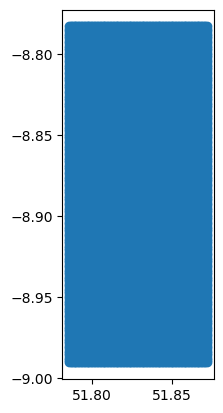

In [67]:
gdf.plot()
plt.show()